In [1]:
# 1
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined_MouseID_df = pd.merge(mouse_drug_data_df, clinical_trial_data_df, how='outer', on='Mouse ID')

# Rearrange the Columns
combined_MouseID_df = combined_MouseID_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites", "Drug"]]


# Display the data table for preview
combined_MouseID_df.head(5)



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,f234,0,45.000000,0,Stelasyn
1,f234,5,47.313491,0,Stelasyn
2,f234,10,47.904324,0,Stelasyn
3,f234,15,48.735197,1,Stelasyn
4,f234,20,51.112713,2,Stelasyn


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [3]:
# 2
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
mean_tumor_volume_grouped = (combined_MouseID_df.groupby(["Drug", "Timepoint"])).mean()

# Convert to DataFrame
mean_tumor_volume_df = (pd.DataFrame(mean_tumor_volume_grouped)).reset_index()

# Preview DataFrame
mean_tumor_volume_df.loc[ : , ["Drug", "Timepoint", "Tumor Volume (mm3)"]].head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

# Convert to DataFrame

# Preview DataFrame



In [5]:
# 3
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

# Group the df by "Drug" and "Timepoint"
# For each reading of "for" loop read in to seperate list:
# - the drug
# - timepoint and
# - tumor volume   
sample = []
drug = []
timeframe = []
for g, data in combined_MouseID_df.groupby(["Drug", "Timepoint"]):
    drug.append(g[0])
    timeframe.append(g[1])
    sample.append(data["Tumor Volume (mm3)"])

# Calculate the mean
means = [s.mean() for s in sample]

# Calculate standard error on means
sem = [s.sem() for s in sample]

# Standard error data frame
standard_error_df = pd.DataFrame({"Drug": drug, "Timepoint": timeframe, "Tumor Volume (mm3)": sem})
standard_error_df.head(5)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [6]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [7]:
# 4
# Minor Data Munging to Re-Format the Data Frames
reformat_df = mean_tumor_volume_df.pivot(index = "Timepoint", columns='Drug', values='Tumor Volume (mm3)')

# Preview that Reformatting worked
reformat_df.head(5)


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


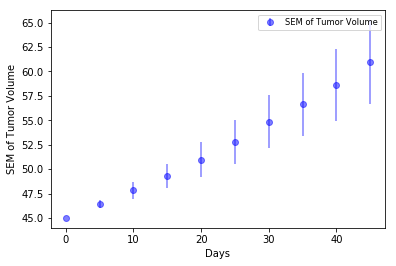

In [8]:
# Generate the Plot (with Error Bars)

fig, ax = plt.subplots()
mean = []
sem = []

# Read samples for different timeframe using index timepoint
# Calculate mean and sem and store it in the list 
timepoint_list = list(reformat_df.index)
for x in timepoint_list:
    sample = reformat_df.loc[ x, :]
    mean.append(sample.mean())
    sem.append(sample.sem())

# Generate the plot
ax.errorbar(np.arange(0, timepoint_list[-1]+1, 5), mean, yerr=sem, fmt="o", color="b", alpha=0.5, label="SEM of Tumor Volume")

# Label X-axis, Y-axis and legend
ax.set_xlabel("Days")
ax.set_ylabel("SEM of Tumor Volume")
plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("SEM_of_Tumor-Volume.png")

# Show the plot
plt.show()

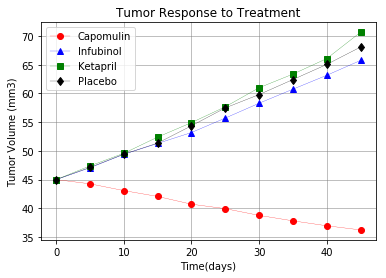

In [9]:
# 5
# Graph for tuor volume response
tumor_volume = (pd.DataFrame(reformat_df)).reset_index()

# Create X axis list
days_x = tumor_volume["Timepoint"]

# List of drugs to graph
drugs = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]

# Plot aesthetic details for each drug
plot_aesthetic_details = {"Capomulin": ["red", "Capomulin", "o", 0.25],
                          "Infubinol": ["blue", "Infubinol", "^", 0.25],
                          "Ketapril": ["green", "Ketapril", "s", 0.25],
                          "Placebo": ["black", "Placebo", "d", 0.25]
                         }

# For each drug
for drug in drugs:   
    # Read tumor volume at each timepoint 
    tumor_response = list(tumor_volume[drug])
    
    # Read plot aesthetic
    plot_color = plot_aesthetic_details[drug][0]
    plot_label = plot_aesthetic_details[drug][1]
    plot_marker = plot_aesthetic_details[drug][2]
    plot_linewidth = plot_aesthetic_details[drug][3]
    
    # Plot the chart and apply some styling
    graph, = plt.plot(days_x, tumor_response, color=plot_color, label=plot_label,
                      marker=plot_marker, linewidth=plot_linewidth)

 
# Label X and Y axes. Add title
plt.title("Tumor Response to Treatment")
plt.xlabel("Time(days)")
plt.ylabel("Tumor Volume (mm3)")

# Create a legend for the chart
plt.legend(loc="upper-left")

# Create Grids
plt.grid(color='grey', linestyle='-', linewidth=0.5)

# Save the Figure
plt.savefig("Tumor-Volume_Response.png")

# Show the Figure
plt.show()    


## Metastatic Response to Treatment

In [10]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [11]:
# 6
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
drug_timepoint_grouped = combined_MouseID_df.groupby(["Drug", "Timepoint"])
mean_metastatic = drug_timepoint_grouped["Metastatic Sites"].mean()


# Convert to DataFrame
mean_metastatic_df = pd.DataFrame(mean_metastatic)


# Preview the Data Frame
mean_metastatic_df.head(5)


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [12]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [13]:
# 7
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Group the df by "Drug" and "Timepoint"
# For each reading of "for" loop read in to seperate list:
# - the drug
# - timepoint and
# - met. sites   
sample = []
drug = []
timeframe = []
for g, data in combined_MouseID_df.groupby(["Drug", "Timepoint"]):
    drug.append(g[0])
    timeframe.append(g[1])
    sample.append(data["Metastatic Sites"])

# Calculate the mean
means = [s.mean() for s in sample]

# Calculate standard error on means
sem = [s.sem() for s in sample]

# Convert to DataFrame
standard_error_df = pd.DataFrame(sem, index = [drug, timeframe], columns = ["Metastatic Sites"])

# Preview the DataFrame
standard_error_df.head(5)


Metastatic Sites
Capomulin 0           0.000000
          5           0.074833
          10          0.125433
          15          0.132048
          20          0.161621

In [14]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [15]:
# 8
# Minor Data Munging to Re-Format the Data Frames
reformat_df = mean_tumor_volume_df.pivot(index = "Timepoint", columns='Drug', values='Metastatic Sites')

# Preview that Reformatting worked
reformat_df.head(5)


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


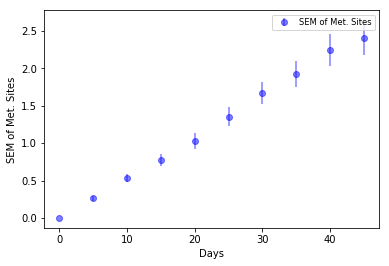

In [16]:
# 8a
# Generate the Plot (with Error Bars)

fig, ax = plt.subplots()
mean = []
sem = []

# Read samples for different timeframe using index timepoint
# Calculate mean and sem and store it in the list 
timepoint_list = list(reformat_df.index)
for x in timepoint_list:
    sample = reformat_df.loc[ x, :]
    mean.append(sample.mean())
    sem.append(sample.sem())

# Generate the plot
ax.errorbar(np.arange(0, timepoint_list[-1]+1, 5), mean, yerr=sem, fmt="o", color="b", alpha=0.5, label="SEM of Met. Sites")

# Label X-axis, Y-axis and legend
ax.set_xlabel("Days")
ax.set_ylabel("SEM of Met. Sites")
plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("SEM_of_Met-Sites.png")

# Show the plot
plt.show()

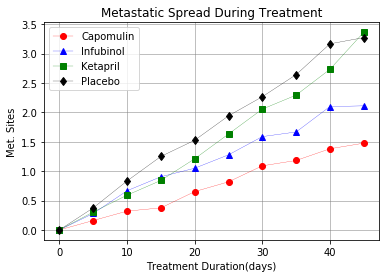

In [17]:
# 9
# Graph for tuor volume response
met_spread = (pd.DataFrame(reformat_df)).reset_index()

# Create X axis list
days_x = met_spread["Timepoint"]

# List of drugs to graph
drugs = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]

# Plot aesthetic details for each drug
plot_aesthetic_details = {"Capomulin": ["red", "Capomulin", "o", 0.25],
                          "Infubinol": ["blue", "Infubinol", "^", 0.25],
                          "Ketapril": ["green", "Ketapril", "s", 0.25],
                          "Placebo": ["black", "Placebo", "d", 0.25]
                         }

# For each drug
for drug in drugs:   
    # Read tumor volume at each timepoint 
    met_response = list(met_spread[drug])
    
    # Read plot aesthetic
    plot_color = plot_aesthetic_details[drug][0]
    plot_label = plot_aesthetic_details[drug][1]
    plot_marker = plot_aesthetic_details[drug][2]
    plot_linewidth = plot_aesthetic_details[drug][3]
    
    # Plot the chart and apply some styling
    graph, = plt.plot(days_x, met_response, color=plot_color, label=plot_label,
                      marker=plot_marker, linewidth=plot_linewidth)

 
# Label X and Y axes. Add title
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration(days)")
plt.ylabel("Met. Sites")

# Create a legend for the chart
plt.legend(loc="upper-left")

# Create Grids
plt.grid(color='grey', linestyle='-', linewidth=0.5)

# Save the Figure
plt.savefig("Met-Spread.png")

# Show the Figure
plt.show()    


## Survival Rates

In [18]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [19]:
# Survival Rates 1
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mean_tumor_volume_grouped = (combined_MouseID_df.groupby(["Drug", "Timepoint"]))
mouse_count = mean_tumor_volume_grouped["Mouse ID"].count()

# Convert to DataFrame
mouse_count_df = pd.DataFrame(mouse_count.reset_index())
mouse_count_df = mouse_count_df.rename(columns={"Mouse ID" : "Mouse Count"})

# Preview DataFrame
mouse_count_df.head(5)


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [20]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [21]:
# Survival Rates 2
# Minor Data Munging to Re-Format the Data Frames
reformat_df = mouse_count_df.pivot(index="Timepoint", columns='Drug', values='Mouse Count')

# Preview the Data Frame
reformat_df.head(5)


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [22]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure


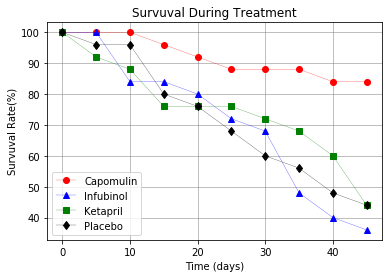

In [23]:
# Survival Rates 3
# Generate the Plot (Accounting for percentages)

survival = (pd.DataFrame(reformat_df)).reset_index()

# Create X axis list
days_x = survival["Timepoint"]

# List of drugs to graph
drugs = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]

# List of plot aesthetic details for each drug
plot_aesthetic_details = {"Capomulin": ["red", "Capomulin", "o", 0.25],
                          "Infubinol": ["blue", "Infubinol", "^", 0.25],
                          "Ketapril": ["green", "Ketapril", "s", 0.25],
                          "Placebo": ["black", "Placebo", "d", 0.25]
                         }

# For each drug
for drug in drugs:   
    # Calculate the survival percent at each timepoint 
    mouse_count = list(survival[drug])
    max_mouse_count = max(mouse_count)
    survival_percent = [(x/max_mouse_count) * 100 for x in mouse_count]
    
    # Read plot aesthetic
    plot_color = plot_aesthetic_details[drug][0]
    plot_label = plot_aesthetic_details[drug][1]
    plot_marker = plot_aesthetic_details[drug][2]
    plot_linewidth = plot_aesthetic_details[drug][3]
    
    # Plot the chart and apply some styling
    graph, = plt.plot(days_x, survival_percent, color=plot_color, label=plot_label,
                      marker=plot_marker, linewidth=plot_linewidth)

 

# Add abels to X and Y axes. Add title
plt.title("Survuval During Treatment")
plt.xlabel("Time (days)")
plt.ylabel("Survuval Rate(%)")

# Create a legend for the chart
plt.legend(loc="bottom-left")

# Create Grids
plt.grid(color='grey', linestyle='-', linewidth=0.5)

# Save the Figure
plt.savefig("Survuval-During-Treatment.png")

# Show the Figure
plt.show()    

## Summary Bar Graph

In [24]:
# Calculate the percent changes for each drug

# Display the data to confirm



In [25]:
# Summary Bar Graph 1
# Calculate the percent changes for each drug


reformat_df = mean_tumor_volume_df.pivot(index = "Timepoint", columns='Drug', values='Tumor Volume (mm3)')

# Create empty list to hold percentage change in volume 
# Create empty list to hold the name of the drug
percent_change_volume = []
drug = []

# Read the key, value pair. 
# Use the first key (day one) and last key (last day) to calculate the change 
for key, value in reformat_df.iteritems():
    value = list(value)
    drug.append(key)
    percent_change = ((value[-1] - value[0]) / value[0]) * 100
    percent_change_volume.append(percent_change)

# Create data frame
percent_change_df = pd.DataFrame(percent_change_volume, index=[drug], columns=["Percent Change"])

# Display the data to confirm
percent_change_df

,Percent Change
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347
Placebo,51.297960
Propriva,47.241175
Ramicane,-22.320900
Stelasyn,52.085134
Zoniferol,46.579751


Text(0, 0.5, '% tumor Volume Change')

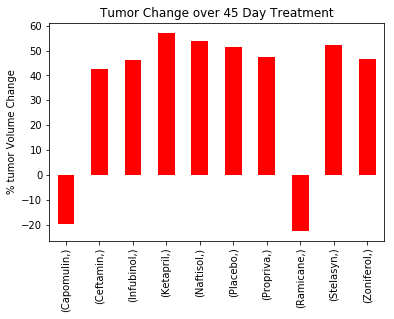

In [26]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs
percent_change_df["Pass/Fail"] = np.where(percent_change_df["Percent Change"] < 0, "Pass", "Fail")

# Configure plot and ticks
percent_change_df["Percent Change"].plot(kind="bar", facecolor="red")

# Set textual properties
plt.title("Tumor Change over 45 Day Treatment")
plt.ylabel("% tumor Volume Change")


# Get total battle data

# Configure plot and ticks


# Set textual properties


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
#fig.show()